rice_leaf_diseases_Detection_challenge

In [45]:
from tensorflow.keras.preprocessing.image  import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import os

In [46]:
os.getcwd()

'C:\\Users\\AMOS\\Desktop\\rice_leaf_diseases_Detection_challenge'

In [47]:
os.chdir(r'C:\Users\AMOS\Desktop\rice_leaf_diseases_Detection_challenge')
os.getcwd()

'C:\\Users\\AMOS\\Desktop\\rice_leaf_diseases_Detection_challenge'

(np.float64(-0.5), np.float64(119.5), np.float64(119.5), np.float64(-0.5))

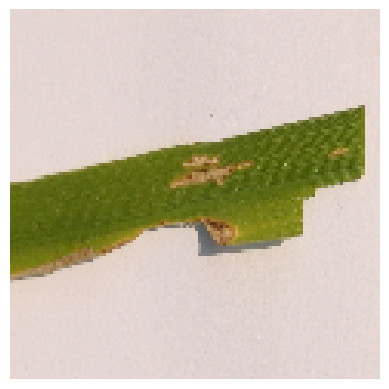

In [48]:
img_height=120
img_width=120

#loading image
img_train_Bacterial=image.load_img(r'C:\Users\AMOS\Desktop\rice_leaf_diseases_Detection_challenge\train\Bacterial leaf blight\DSC_0365.JPG',
                                  target_size=(img_height,img_width))
plt.imshow(img_train_Bacterial)
plt.axis('off')

(np.float64(-0.5), np.float64(119.5), np.float64(119.5), np.float64(-0.5))

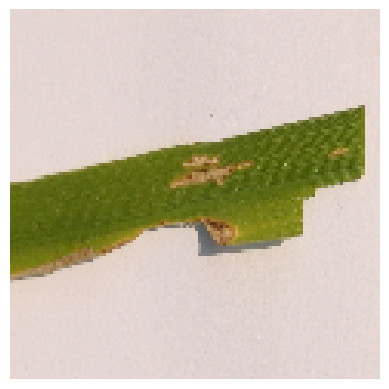

In [49]:
#loading image
img_train_Brown=image.load_img(r'C:\Users\AMOS\Desktop\rice_leaf_diseases_Detection_challenge\train\Brown spot\DSC_0100.JPG',
                                  target_size=(img_height,img_width))
plt.imshow(img_train_Bacterial)
plt.axis('off')

(np.float64(-0.5), np.float64(119.5), np.float64(119.5), np.float64(-0.5))

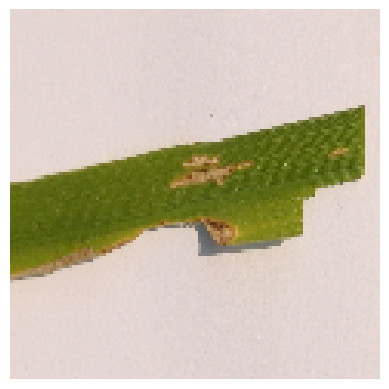

In [50]:
#loading image
img_train_Leaf=image.load_img(r'C:\Users\AMOS\Desktop\rice_leaf_diseases_Detection_challenge\train\Leaf smut\DSC_0308.JPG',
                                  target_size=(img_height,img_width))
plt.imshow(img_train_Bacterial)
plt.axis('off')

In [51]:
cv2.imread(r'C:\Users\AMOS\Desktop\rice_leaf_diseases_Detection_challenge\train\Bacterial leaf blight\DSC_0365.JPG').shape

(897, 3081, 3)

In [52]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [53]:
train_data = train.flow_from_directory(
    r'C:\Users\AMOS\Desktop\rice_leaf_diseases_Detection_challenge\train',
    target_size=(120, 120),  # Match model input
    batch_size=3,
    class_mode='categorical'
)

validation_data = train.flow_from_directory(
    r'C:\Users\AMOS\Desktop\rice_leaf_diseases_Detection_challenge\validation',
    target_size=(120, 120),  # Match model input
    batch_size=3,
    class_mode='categorical'
)


Found 120 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [54]:
train_data.class_indices

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

In [55]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(120, 120, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Multi-class output
])



In [56]:
model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='categorical_crossentropy',  # Use categorical for one-hot encoded labels
    metrics=['accuracy']
)


In [57]:
model.fit(
    train_data,
    validation_data=validation_data,  # Include validation set
    epochs=10,
    verbose=1
)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 509ms/step - accuracy: 0.4000 - loss: 3.2432 - val_accuracy: 0.3333 - val_loss: 1.1613
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 429ms/step - accuracy: 0.4083 - loss: 1.2402 - val_accuracy: 0.5250 - val_loss: 0.9796
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 435ms/step - accuracy: 0.4500 - loss: 1.2310 - val_accuracy: 0.5333 - val_loss: 0.8743
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 430ms/step - accuracy: 0.5333 - loss: 1.1424 - val_accuracy: 0.8417 - val_loss: 0.7202
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 432ms/step - accuracy: 0.6833 - loss: 0.9306 - val_accuracy: 0.8417 - val_loss: 0.4956
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 448ms/step - accuracy: 0.7500 - loss: 0.7371 - val_accuracy: 0.7417 - val_loss: 0.6647
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 446ms/step - accuracy: 0.7833 - loss: 0.5818 - val_accuracy: 0.8000 - val_loss: 0.3920
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 463ms/step - accuracy: 0.8167 - loss: 0.3894 - val_accu

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    r"C:\Users\AMOS\Desktop\rice_leaf_diseases_Detection_challenge\test",  # Update this path to your test folder
    target_size=(120, 120),
    batch_size=3,
    class_mode='categorical',
    shuffle=False
)


Found 120 images belonging to 3 classes.


In [61]:
model.evaluate(test_data)

40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 225ms/step - accuracy: 0.9500 - loss: 0.0999 


[0.09986019879579544, 0.949999988079071]

In [62]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(r"C:\Users\AMOS\Desktop\rice_leaf_diseases_Detection_challenge\train\Bacterial leaf blight\DSC_0370.jpg", target_size=(120, 120))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
print("Prediction:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
Prediction: [[9.9947721e-01 5.0024857e-04 2.2512409e-05]]


In [63]:
history = model.fit(train_data, epochs=10, verbose=1)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 261ms/step - accuracy: 0.9250 - loss: 0.1446
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 246ms/step - accuracy: 0.9667 - loss: 0.0847    
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step - accuracy: 1.0000 - loss: 0.0131
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 251ms/step - accuracy: 0.9750 - loss: 0.0875    
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 261ms/step - accuracy: 1.0000 - loss: 0.0027    
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 267ms/step - accuracy: 1.0000 - loss: 2.0380e-04
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 264ms/step - accuracy: 1.0000 - loss: 3.1402e-05
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 250ms/step - accuracy: 1.0000 - loss: 1.3654e-04
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 276ms/step - accuracy: 1.0000 - loss: 4.3521e-05
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 314ms/step - accuracy: 0.9583 - loss: 0.0737


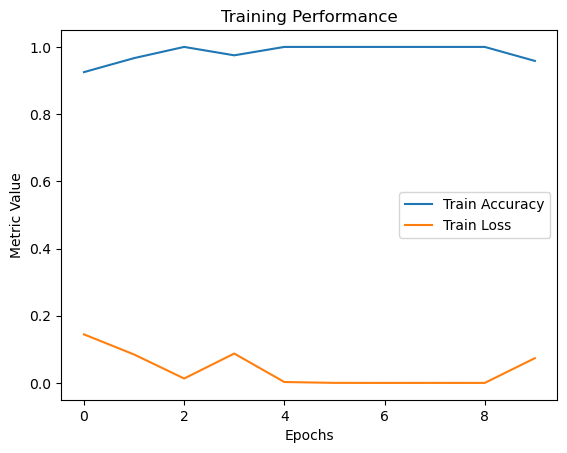

In [64]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.legend()
plt.title("Training Performance")
plt.xlabel("Epochs")
plt.ylabel("Metric Value")
plt.show()
